# BIGMART SALES PREDICTION

### Hypothesis Generation

Product level hypotheses:
1. Brand: Branded products have more trust of the customers so they should have high sales.
2. Visibility in Store: The location of the product placement also depends on the sales.
3. Display Area: Products that are placed at an attention-catching place should have more sales.
4. Utility: Daily use products have a higher tendency to sell compared to other products.
5. Packaging: Quality packaging can attract customers and sell more.

Store Level Hypotheses:
1. City type: Stores located in urban cities should have higher sales.
2. Store Capacity: One-stop shops are big in size so their sell should be high.
3. Population density: Densely populated areas have high demands so the store located in these areas should have higher sales.
4. Marketing: Stores having a good marketing division can attract customers through the right offers.

### Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
train = pd.read_csv("D://Technocolabs//train.csv")
test = pd.read_csv("D://Technocolabs//test.csv")

# Data Structure and Content

In [98]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [99]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [100]:
#Numerical data summary:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning

In [101]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [102]:
#Filling missing values
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())


In [103]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [104]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [105]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [106]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [108]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### EDA

In [109]:
import seaborn as sns

In [110]:
sns.set()

### Univariate Analysis

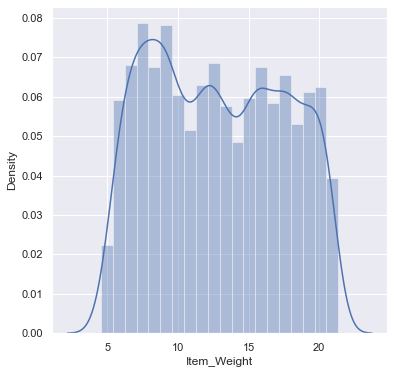

In [111]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

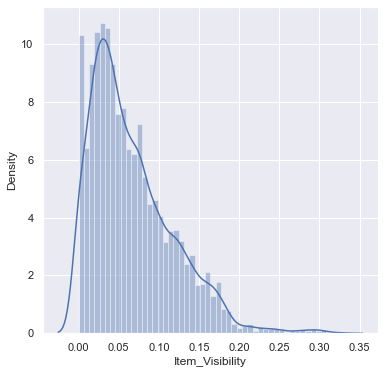

In [112]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

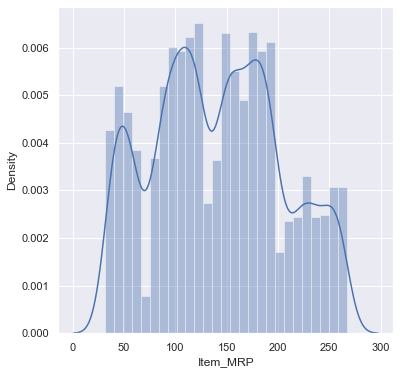

In [113]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

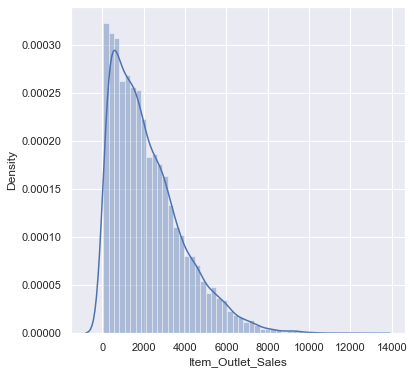

In [114]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


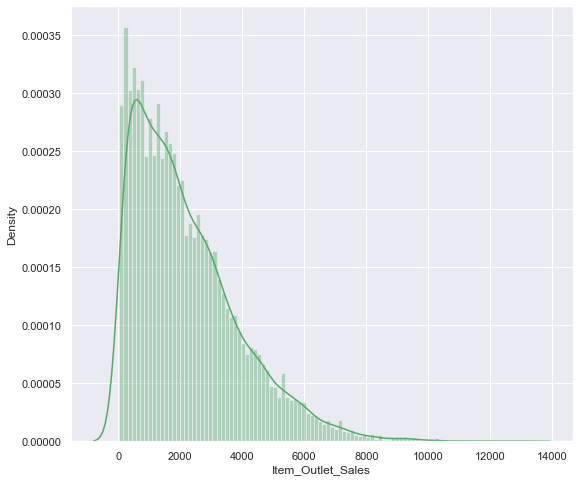

In [77]:
print(train['Item_Outlet_Sales'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['Item_Outlet_Sales'], color='g', bins=100, hist_kws={'alpha': 0.4});

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

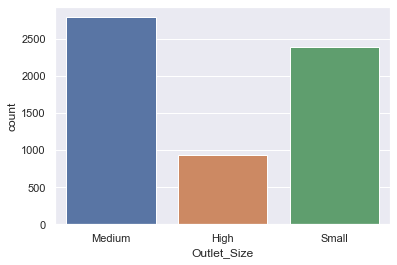

In [115]:
sns.countplot(train.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

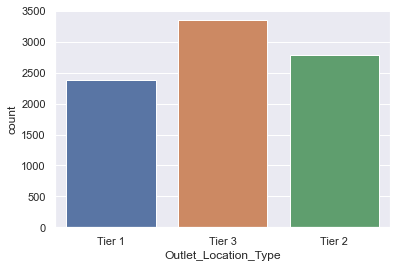

In [116]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

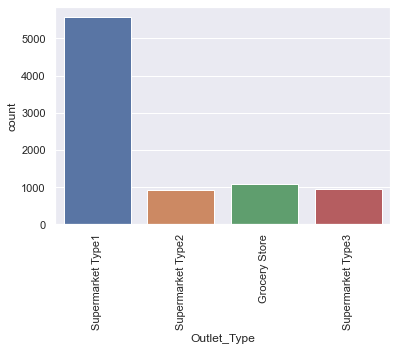

In [117]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

### Bivariate Analysis

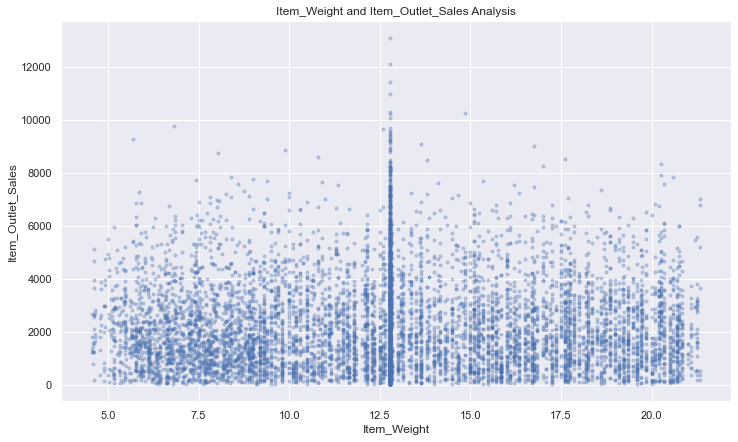

In [91]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

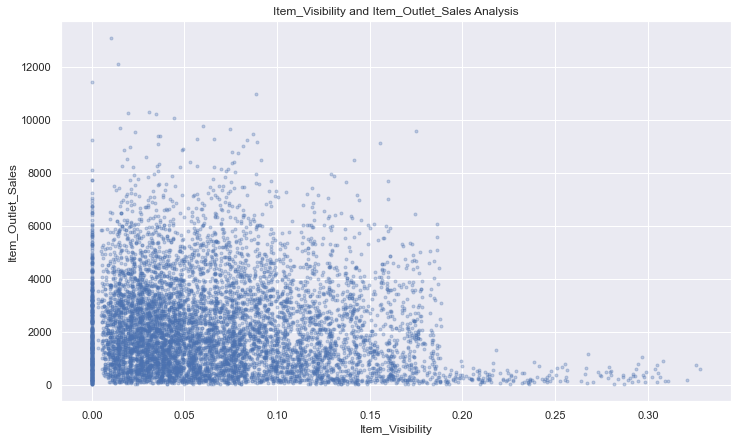

In [93]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

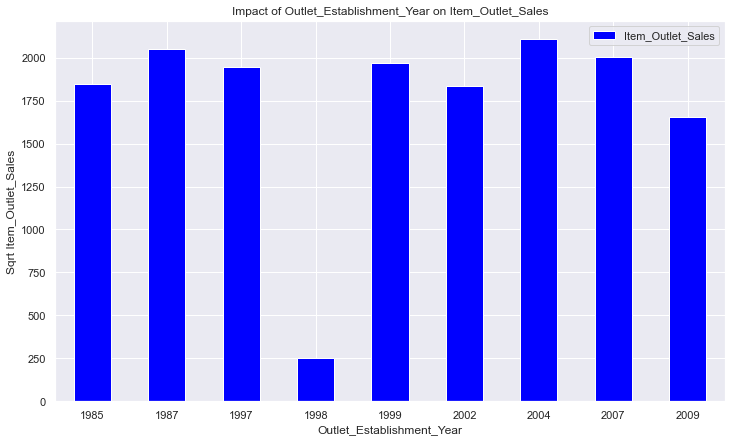

In [118]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', 	values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

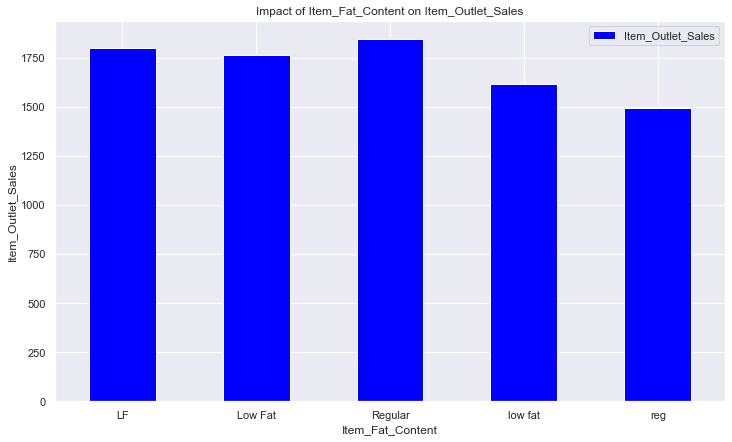

In [119]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

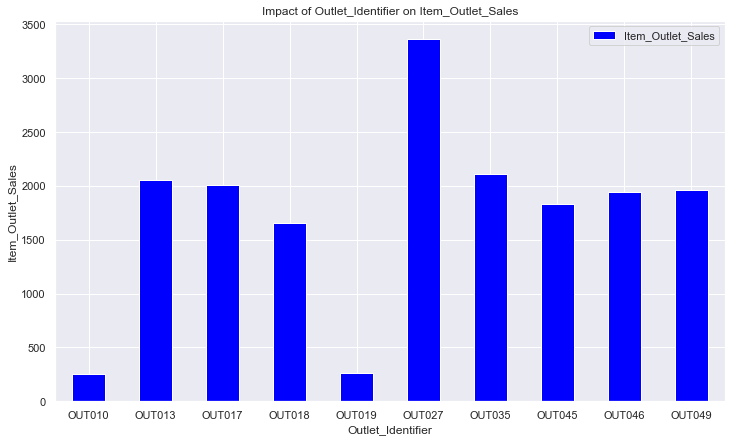

In [120]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [121]:
train.pivot_table(values='Outlet_Type',
              columns='Outlet_Identifier',
              aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [122]:
train.pivot_table(values='Outlet_Type',
              columns='Outlet_Size',
              aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


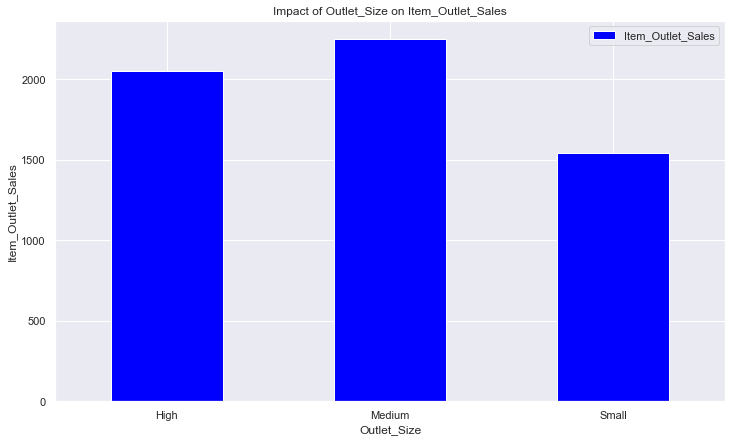

In [123]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

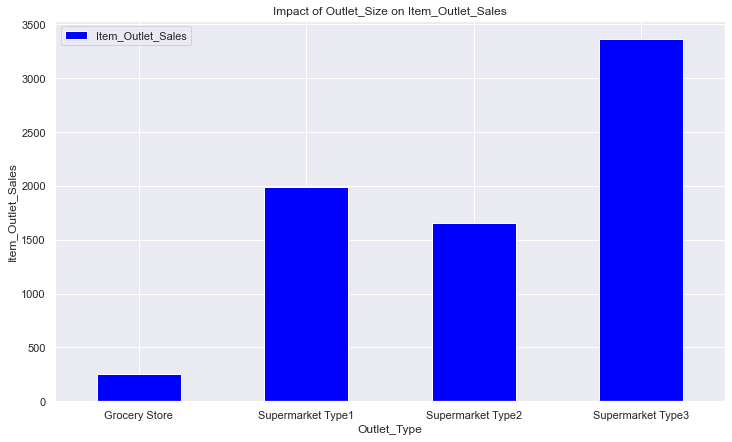

In [124]:
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

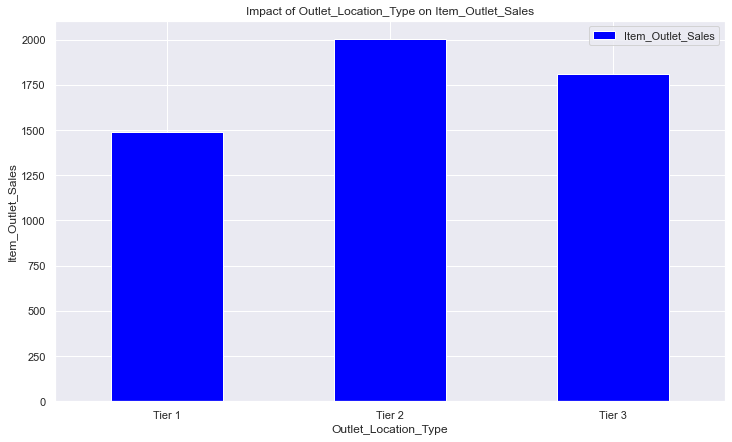

In [125]:
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [126]:
train.pivot_table(values='Outlet_Location_Type',
              columns='Outlet_Type',
              aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


### Feature Engineering

In [127]:
#Creates pivot table with Outlet_Type and the mean of
#Item_Outlet_Sales. Agg function is by default mean()

data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,1076.412666,2262.232963,2069.766739,3088.550567


In [129]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [136]:
#Change the category of low fatprint('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified categories')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                              'low fat':'Low Fat',
                              'reg':'Regular'})

print(data['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified categories
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Numerical and One-Hot Coding of Categorical variables

In [138]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [139]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [140]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,26,...,0,1,0,0,0,0,0,0,0,0


In [141]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

## Exporting Data

In [142]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

## Model Building

In [143]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [144]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,14,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,15,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,26,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [145]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [146]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [147]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,4,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,15,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,26,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [148]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression Model

In [149]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [150]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [151]:
y_pred

array([1847.15910268, 1573.52276942, 1874.13419298, ..., 1808.73681713,
       3561.5386965 , 1263.79841883])

In [152]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [153]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.35

In [154]:
r2_score(y_train, regressor.predict(X_train))

0.5635180059745906

In [155]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [156]:
print(np.sqrt(np.abs(cv_score)))

[1150.82183004 1118.35137951 1112.8159326  1126.52672658 1140.57668055]


In [157]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


In [42]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [158]:
submission.to_csv('sub1.csv',index=False)

## Decision Tree Model

In [159]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [160]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3805.94860417, 1349.51290433])

In [161]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [162]:
r2_score(y_train, regressor.predict(X_train))

0.588335434306813

In [163]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1136.23452399 1113.39546433 1141.5447044  1105.70108903 1125.89661288]


In [164]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))


RMSE : 1095


In [165]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [166]:
submission.to_csv('sub2.csv',index=False)

## Random Forest Model

In [167]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [168]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1655.75142069, 1363.44117438,  587.93711932, ..., 1945.49270529,
       3657.98754189, 1286.8080117 ])

In [169]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [170]:
r2_score(y_train, regressor.predict(X_train))

0.6129031165310224

In [171]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1100.19382153 1078.50946466 1077.51747577 1070.49381791 1083.87708789]


In [172]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [173]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [174]:
submission.to_csv('sub3.csv',index=False)

### XG BOOST

In [175]:
from xgboost import XGBRegressor

In [178]:
regressor = XGBRegressor()

In [179]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [180]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [181]:
# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [182]:
print('R Squared value = ', r2_train)

R Squared value =  0.8325010971373805
